# Machine Learning Summative

In this summative, The puprpose is to create a regression model that predicts the energy that might be consumed by different infrastructures mainly houses in different environments, basing on factors like:
- Temperature
- Humidity
- SquareFootage
- Occupancy
- HVACUsage
- LightingUsage
- Presence of RenewableEnergy

The idea to build such a model is based on the mission which states,
"Facilitating sustainable infrastructure development by harnessing cutting-edge technological solutions, fostering innovation, and building resilient systems."

With the energy prediction model,from households to institutional buildings and other multi-purpose buildings, informed decisions can be made on how to take action on the energy being consumed sustainably.

The steps involved in achieveing that involves building different models (linear regression model, random forest regressor model, and decision tree regressor model), comparing their root mean squared errors, and saving the best performing model with the lowest rsme.

# Importing the necessary libraries

In [19]:

# Libraries for programmatic plot generation.
import matplotlib.pyplot as plt
import seaborn as sns
# A library for data manipulation and analysis.
import pandas as pd
# LinearRegression from sklearn.
from sklearn.linear_model import LinearRegression
# Random forest model import
from sklearn.ensemble import RandomForestRegressor
# Decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
# importing a built-in function from sklearn.metrics for RSME
from sklearn.metrics import root_mean_squared_error
# Importing labelencoder for handling categorical features
from sklearn.preprocessing import LabelEncoder
# Importing pickle for saving the model
import pickle
# Loading drive data in the notebook
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [20]:
# Importing the dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Data/Energy_consumption.csv")
df.head(10)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
5,2022-01-01 05:00:00,29.576037,36.824263,1871.709180,6,Off,Off,17.626690,Sunday,Yes,84.321885
6,2022-01-01 06:00:00,25.131167,35.709622,1607.001228,6,On,Off,24.264702,Friday,Yes,76.165791
7,2022-01-01 07:00:00,23.182844,31.679920,1633.955330,8,Off,Off,27.517099,Thursday,Yes,74.131906
8,2022-01-01 08:00:00,25.391999,46.399364,1240.309224,6,On,Off,2.307595,Sunday,No,78.206236
9,2022-01-01 09:00:00,22.212549,32.418464,1705.420336,1,On,Off,29.140071,Tuesday,No,77.992214


# Reading The Dataset And Exploration

In [21]:
# Converting the timestamp into a datetime object and to facilitate datetime-based slicing
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [22]:
# Expecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2022-01-01 00:00:00 to 2022-02-11 15:00:00
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        1000 non-null   float64
 1   Humidity           1000 non-null   float64
 2   SquareFootage      1000 non-null   float64
 3   Occupancy          1000 non-null   int64  
 4   HVACUsage          1000 non-null   object 
 5   LightingUsage      1000 non-null   object 
 6   RenewableEnergy    1000 non-null   float64
 7   DayOfWeek          1000 non-null   object 
 8   Holiday            1000 non-null   object 
 9   EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 85.9+ KB


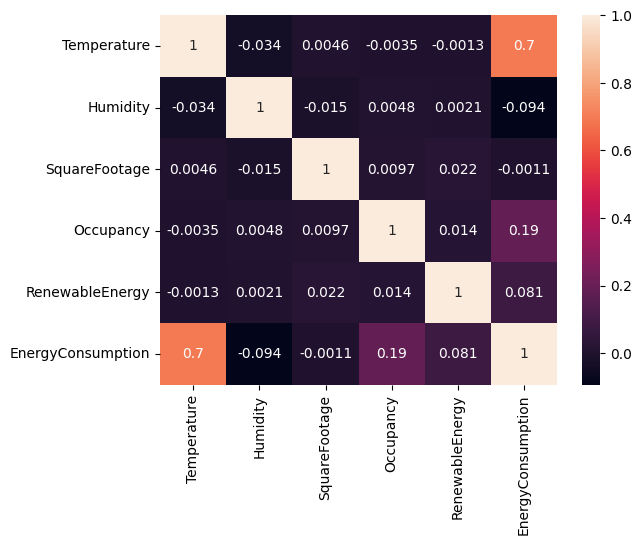

In [23]:
# Plotting a visualization to see the correlation between the numerical features in the dataset
correlation = df.select_dtypes("number").corr()
sns.heatmap(correlation, annot=True)
plt.show()

In [24]:
# Creating a lag feature to increase the predictive power of the model
df["EnergyConsumption.L1"] = df["EnergyConsumption"].shift(1)
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,EnergyConsumption.L1
Timestamp,,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,NaN
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,75.364373
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,83.401855
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,78.270888
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,56.519850


In [25]:
# Dropping the null values row
df.dropna(inplace=True)
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,EnergyConsumption.L1
Timestamp,,,,,,,,,,,
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,75.364373
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,83.401855
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,78.270888
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,56.519850
2022-01-01 05:00:00,29.576037,36.824263,1871.709180,6,Off,Off,17.626690,Sunday,Yes,84.321885,70.811732


# Handling Categorical Data And Saving The Encoder For API

In [26]:
# Data preparation with encoders
categorical_cols = ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']
encoders = {}

# Fit and encode categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    encoders[col] = le

# Save the encoder to a file
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

df.head(10)

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,EnergyConsumption.L1,HVACUsage_encoded,LightingUsage_encoded,DayOfWeek_encoded,Holiday_encoded
Timestamp,,,,,,,,,,,,,,,
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,75.364373,1,1,2,0
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,83.401855,0,0,3,0
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,78.270888,0,1,6,0
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,56.519850,1,0,0,0
2022-01-01 05:00:00,29.576037,36.824263,1871.709180,6,Off,Off,17.626690,Sunday,Yes,84.321885,70.811732,0,0,3,1
2022-01-01 06:00:00,25.131167,35.709622,1607.001228,6,On,Off,24.264702,Friday,Yes,76.165791,84.321885,1,0,0,1
2022-01-01 07:00:00,23.182844,31.679920,1633.955330,8,Off,Off,27.517099,Thursday,Yes,74.131906,76.165791,0,0,4,1
2022-01-01 08:00:00,25.391999,46.399364,1240.309224,6,On,Off,2.307595,Sunday,No,78.206236,74.131906,1,0,3,0
2022-01-01 09:00:00,22.212549,32.418464,1705.420336,1,On,Off,29.140071,Tuesday,No,77.992214,78.206236,1,0,5,0


In [27]:
# dropping the categorical features by creating a sub-dataset to maintain the integrity of the original data
df1 = df.drop(columns=["HVACUsage", "LightingUsage", "DayOfWeek", "Holiday"])
df1.head()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,EnergyConsumption.L1,HVACUsage_encoded,LightingUsage_encoded,DayOfWeek_encoded,Holiday_encoded
Timestamp,,,,,,,,,,,
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,21.831384,83.401855,75.364373,1,1,2,0
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,6.764672,78.270888,83.401855,0,0,3,0
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,8.623447,56.519850,78.270888,0,1,6,0
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,3.071969,70.811732,56.519850,1,0,0,0
2022-01-01 05:00:00,29.576037,36.824263,1871.709180,6,17.626690,84.321885,70.811732,0,0,3,1


# Model Building And Evaluation

In [28]:
# Splitting the data into target and features
X = df1.drop(columns=["EnergyConsumption"])
y = df1["EnergyConsumption"]


In [29]:
#Splitting the data into train and test sets
cutoff = int(len(X) * 0.8)

X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

One of the metrics of evaluation a model includes creating a baseline RSME value with the mean of the predictions. When the training and tests sets go below (beat) the baseline RSME, it is an indicator that one is in the right way. For that matter, let us create one.

In [30]:
# creating a dummy RSME
y_pred_baseline = [y_train.mean()] * len(y_train)
RSME_baseline = root_mean_squared_error(y_train, y_pred_baseline)

print("Mean Energy Consumption Reading:", round(y_train.mean(), 2))
print("Baseline RSME:", round(RSME_baseline, 2))

Mean Energy Consumption Reading: 76.94
Baseline RSME: 8.22


In [31]:
#Building a linear regression model

Lr_model = LinearRegression()

# Building a randomforest model
rf_model = RandomForestRegressor(random_state=42)

# Building a decisiontreeregressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Fitting the models
Lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [32]:
# Calculating the rsmes for the models for comparison
Lr_rsme = root_mean_squared_error(y_test, Lr_model.predict(X_test))
rf_rsme = root_mean_squared_error(y_test, rf_model.predict(X_test))
dt_rsme = root_mean_squared_error(y_test, dt_model.predict(X_test))

print("Linear Regression RSME:", round(Lr_rsme, 2))
print("Random Forest RSME:", round(rf_rsme, 2))
print("Decision Tree RSME:", round(dt_rsme, 2))

Linear Regression RSME: 5.01
Random Forest RSME: 5.2
Decision Tree RSME: 8.17


From the RSMEs scores of all the three models, it is clearly visible that the linear regression model is the one that is performing better. Therefore, it will be saved and used for creating a FastAPi. However, let us first visualize the trends in the actual vs the predicted data for the best performing mode (Linear regression model).

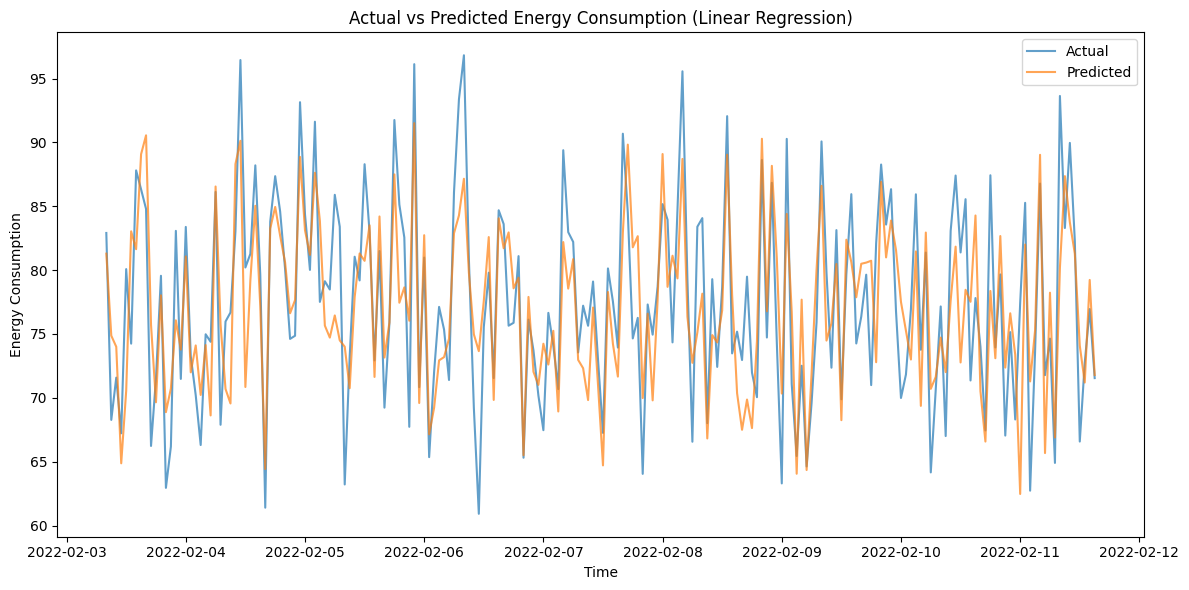

In [33]:
# Visualize actual vs predicted for the best model (Linear Regression)
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual', alpha=0.7)
plt.plot(y_test.index, Lr_model.predict(X_test), label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Energy Consumption (Linear Regression)')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.tight_layout()
plt.show()

# Model Saving

In [35]:
# Saving the best performing model to be used in the API
pickle.dump(Lr_model, open("linear_model.sav", "wb"))
# Loading the model
loaded_model = pickle.load(open("linear_model.sav", "rb"))